# Missing Values- Feature Engineering- Day 1
### Lifecycle of a Data Science Projects

    1.Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
    2.Feature Engineering---Handling Missing Values
    3.Why are their Missing values?? Survey--Depression Survey

    They hesitate to put down the information
    Survey informations are not that valid
    Men--salary
    Women---age
    People may have died----NAN
    Data Science Projects---Dataset should be collected from multiple sources

    What are the different types of Missing Data?


#### 1. Missing Completely at Random,(MCAR): A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('titanic-dataset.zip')

In [7]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [11]:
df[df['embarked'].isnull()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,1


##### 2.Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [16]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [26]:
import numpy as np

In [28]:
df['cabin_null']= np.where(df['cabin'].isnull(),1,0)

# find the percentage of new generated column cabin_null
df['cabin_null'].mean()

0.7752941176470588

In [ ]:
df

In [30]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived', 'cabin_null'],
      dtype='object')

Above in output you can see that this is a new column has generated as 'cabin_null' which indicates all null values of cabin column/

In [33]:
df.groupby(['survived'])['cabin_null'].mean()

survived
0    0.880819
1    0.594249
Name: cabin_null, dtype: float64

# 3.Missing At Random(MAR)

         
     Men---hide their salary
         Women---hide their age


# All the techniques of handling missing values

    1. Mean/ Median/Mode replacement
    2. Random Sample Imputation
    3. Capturing NAN values with a new feature
    4. End of Distribution imputation
    5. Arbitrary imputation
    6. Frequent categories imputation

# 1.Mean/ MEdian /Mode imputation
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [35]:
df = pd.read_csv('titanic-dataset.zip',usecols=['fare','age','survived'])

In [36]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [38]:
#find the percentage of missing values
df.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [44]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)

In [45]:
median=df.age.median()
median

28.0

In [46]:
impute_nan(df,'age',median)
df.head()

,age,fare,survived,age_median
0,NaN,7.7333,1,28.0
1,38.0,8.6625,0,38.0
2,30.0,24.1500,0,30.0
3,54.0,23.0000,1,54.0
4,40.0,13.0000,0,40.0


In [48]:
print(df['age'].std())
print(df['age_median'].std())

14.562243434125529
12.999022882894222


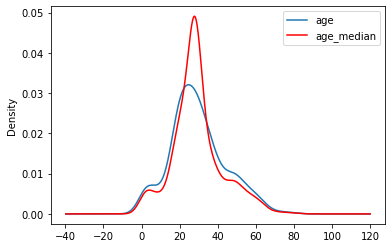

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages And Disadvantages of Mean/Median Imputation
  #### Advantages
   * Easy to implement(Robust to outliers)
   * Faster way to obtain the complete dataset 
   
 #### Disadvantages  
   * Change or Distortion in the original variance
   * Impacts Correlation

# 2. Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd


In [6]:
df =  pd.read_csv('titanic-dataset.zip',usecols=['age','fare','survived'])

In [7]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [8]:
df.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [9]:
df.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [10]:
df['age'].isnull().sum()

174

In [15]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

716    27.0
39     29.0
446    25.0
240     8.0
508    32.0
       ... 
801    47.0
669     9.0
768    21.0
16     40.0
250    48.0
Name: age, Length: 174, dtype: float64

In [13]:
df[df['age'].isnull()].index

Int64Index([  0,  17,  21,  28,  30,  31,  33,  38,  41,  46,
            ...
            763, 778, 780, 787, 794, 814, 820, 821, 828, 836],
           dtype='int64', length=174)

In [17]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [18]:
median=df['age'].median()

In [19]:
median

28.0

In [20]:
impute_nan(df,'age',median)

In [21]:
df.head()

,age,fare,survived,age_median,age_random
0,NaN,7.7333,1,28.0,27.0
1,38.0,8.6625,0,38.0,38.0
2,30.0,24.1500,0,30.0,30.0
3,54.0,23.0000,1,54.0,54.0
4,40.0,13.0000,0,40.0,40.0


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

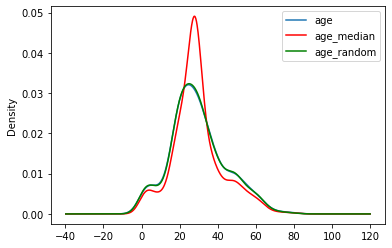

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
df.age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#####  Advantages
    *Easy To implement
    *There is less distortion in variance
##### Disadvantage
    *Every situation randomness wont work
# 3.Capturing NAN values with a new feature  
      It works well if the data are not missing completely at random



In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('titanic-dataset.zip',usecols=['age','fare','survived'])

In [30]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [31]:
import numpy as np
df['age_NAN']=np.where(df['age'].isnull(),1,0)

In [34]:
df.head()

,age,fare,survived,age_NAN
0,NaN,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0


In [35]:
df.age.median()

28.0

In [36]:
df['age'].fillna(df.age.median(),inplace=True)

In [38]:
df.head(10)

,age,fare,survived,age_NAN
0,28.0,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0
5,28.0,22.5250,0,0
6,19.0,0.0000,0,0
7,30.0,13.0000,1,0
8,22.0,7.7750,1,0
9,21.0,9.8250,0,0


#### Advantages
    Easy to implement
    Captures the importance of missing values
#### Disadvantages
    Creating Additional Features(Curse of Dimensionality)


# 4.End of distribution imputation

In [70]:
df = pd.read_csv('titanic-dataset.zip',usecols=['fare','survived','age'])

In [66]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [41]:
df['age'].median()

28.0

<AxesSubplot:>

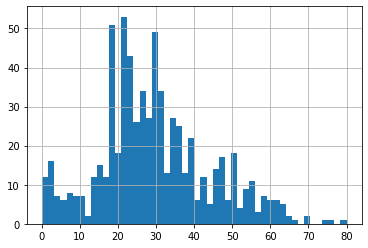

In [44]:
df.age.hist(bins=50)

In [52]:
df.age.std()

14.562243434125529

In [53]:
df.age.median()

28.0

In [73]:
extreme = df.age.median()+3*df.age.std()

In [74]:
extreme

66.99706864868267

In [75]:
import seaborn as sns

C:\pythonnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

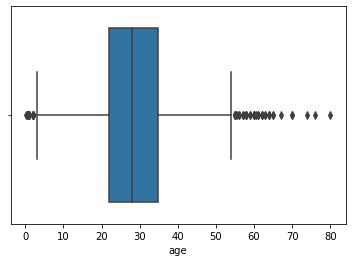

In [76]:
sns.boxplot('age',data=df)

In [77]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [78]:
impute_nan(df,'age',df.age.median(),extreme)

In [79]:
df.head()

,age,fare,survived,age_end_distribution
0,28.0,7.7333,1,28.0
1,38.0,8.6625,0,38.0
2,30.0,24.1500,0,30.0
3,54.0,23.0000,1,54.0
4,40.0,13.0000,0,40.0


<AxesSubplot:>

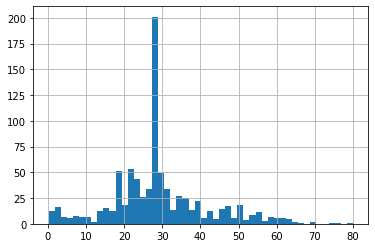

In [80]:
df['age'].hist(bins=50)

<AxesSubplot:>

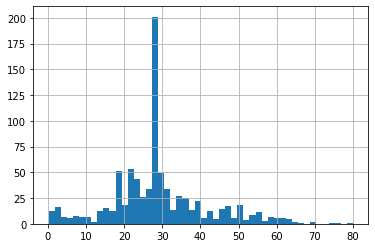

In [81]:
df['age_end_distribution'].hist(bins=50)

C:\pythonnew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_end_distribution'>

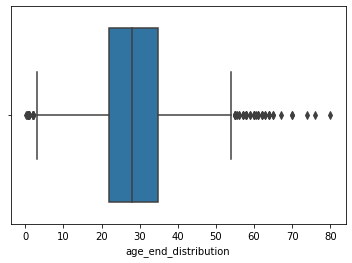

In [82]:
sns.boxplot('age_end_distribution',data=df)

# 5.Arbitrary Value Imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [92]:
import pandas as pd

In [93]:
df = pd.read_csv('titanic-dataset.zip',usecols=['fare','survived','age'])

In [94]:
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [95]:
def impute_nan(df,variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

<AxesSubplot:>

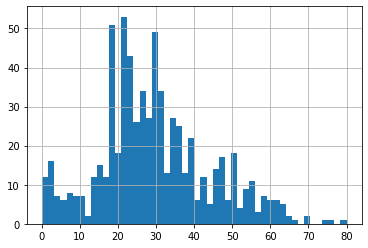

In [99]:
df['age'].hist(bins=50)

### Advantages
    *Easy to implement
    *Captures the importance of missingess if there is one
### Disadvantages
     *Distorts the original distribution of the variable
     *If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
    *Hard to decide which value to use

###  How To Handle Categroical Missing Values
# 6.Frequent Category Imputation

In [2]:
import pandas as pd

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
df = pd.read_csv('train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [15]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [17]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [18]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [19]:
#Sorting percentage of categorical missing values in asscending order

df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute Frequency with every features

In [26]:
df.groupby(['BsmtQual'])['BsmtQual']

In [27]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

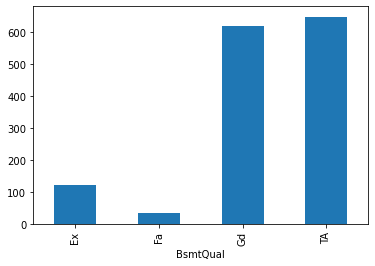

In [29]:
#Plotting all the categorical variable in BsmtQual column
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

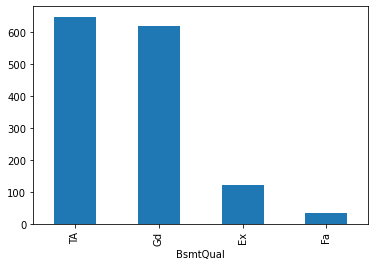

In [31]:
#Plotting all the categorical variable in ascending order of BsmtQual column

df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='GarageType'>

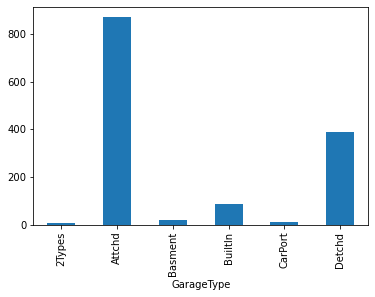

In [42]:
df.groupby(['GarageType'])['GarageType'].count().plot.bar()

<AxesSubplot:xlabel='GarageType'>

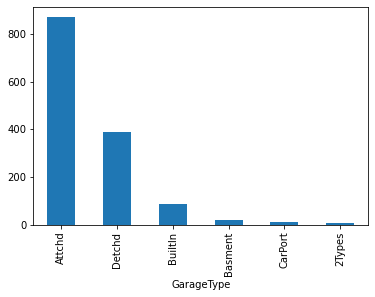

In [46]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

In [47]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:>

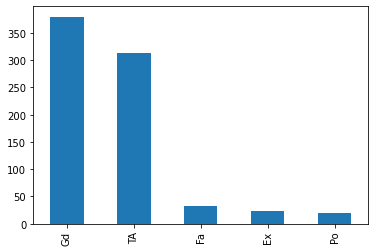

In [48]:
df['FireplaceQu'].value_counts().plot.bar()

In [53]:
df['FireplaceQu'].value_counts()


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [56]:
#Most frequent category variable
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [54]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [57]:
#Most frequent category variable
df['GarageType'].value_counts().index[0]

'Attchd'

In [59]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [60]:
df['BsmtQual'].value_counts().index[0]

'TA'

In [65]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [66]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)



In [67]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [70]:
#Now you can see that all the missins values has gone 
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [71]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Advantages 
    1.Easy to impliments
    2.Faster way to impliments
### Disadvantages
    1.since We are using many Frequent labels,it may use them in an over represented way if there are many nans
    2.It distors the relation of most frequent labels